Plot the various uncertainty intervals for the MESA UQ paper compared in a bar chart

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = []
data.append(dict(label='QRSM (Inner, Optimum, 0.25)', xlo=0.4979, xhi=0.5606, color='k'))
data.append(dict(label='QRSM (Outer, Optimum, 0.25)', xlo=0.4696, xhi=0.5698, color='k'))
data.append(dict(label='QRSM (Inner, Optimum, 0.50)', xlo=0.4979, xhi=0.5606, color='m'))
data.append(dict(label='QRSM (Inner, $10^6$ pt., 0.50)', xlo=0.4978, xhi=0.5607, color='m', linestyle=':'))
data.append(dict(label='QRSM (Outer, Optimum, 0.50)', xlo=0.4811, xhi=0.6119, color='m'))
data.append(dict(label='QRSM (Outer, $10^6$ pt., 0.50)', xlo=0.4976, xhi=0.5655, color='m', linestyle=':'))
data.append(dict(label='CD (0.25) $1\sigma$', xlo=0.4923, xhi=0.5847, color='g'))
data.append(dict(label='CD (0.25) $2\sigma$', xlo=0.4879, xhi=0.5891, color='g'))
data.append(dict(label='CD (0.25) $3\sigma$', xlo=0.4834, xhi=0.5936, color='g'))
data.append(dict(label='CD (1.50) $1\sigma$', xlo=0.4776, xhi=0.6014, color='b'))
data.append(dict(label='CD (1.50) $2\sigma$', xlo=0.4699, xhi=0.6091, color='b'))
data.append(dict(label='CD (1.50) $3\sigma$', xlo=0.4622, xhi=0.6168, color='b'))
data.append(dict(label='Linear Regression', xlo=0.5028, xhi=0.5678, color='r'))

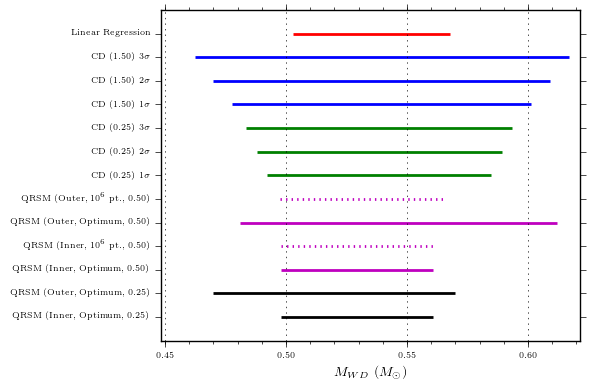

In [7]:
def plot_interval(ypos, xlo, xhi, color='b', linestyle='-', lw=2, label=None):
    plt.hlines(ypos, xlo, xhi, color, linestyle=linestyle, lw=lw)
    
def get_data_extrema(ddict):
    xlos = []
    xhis = []
    for di in ddict:
        xlos.append(di['xlo'])
        xhis.append(di['xhi'])
    xlo = np.amin(xlos)
    xhi = np.amax(xhis)
    return xlo, xhi

nlabels = len(data)

for i, d in enumerate(data):
    d['ypos'] = float(i+1)/float(nlabels+1)
    plot_interval(**d)

ax = plt.gca()

lo, hi = get_data_extrema(data)
eps = 0.01*(hi-lo)

ypos = [d['ypos'] for d in data]
labs = [d['label'] for d in data]

plt.yticks(ypos, labs)
plt.ylim(0,1)

xticks_major = np.arange(0.45, 0.70, 0.05)
xticks_minor = np.arange(0.45, 0.70, 0.01)

# Large major labels
ax.tick_params(axis = 'both', which = 'major', labelsize = 6)

# No minor labels
ax.tick_params(axis = 'both', which = 'minor', labelsize = 0)

# Set Major and Minor xticks
ax.set_xticks(xticks_major)
ax.set_xticks(xticks_minor, minor = True)

# Direct ticks outside
ax.tick_params(which = 'both', direction = 'out')

# Reset x limit
plt.xlim(0.45-eps, 0.62+eps)

# Draw x axis grids
ax.xaxis.grid(True)

plt.xlabel('$M_{WD}~(M_{\odot})$')
#plt.show()
plt.tight_layout()
plt.savefig('cfintervals.eps',format='eps')